### Ajustar regresion lineal


In [1]:
#len() largo de un arreglo

#xsum = xsum + x[i]
#xsum += x[i]    es lo mismo que el anterior, la variable de la izquierda se incrementa por la de la derecha acumulandolo

#y = [] SON LISTAS, NO VECTORES

Simple Linear Regression
$$y = a + bx + e$$
Estimate $a$ and $b$ with normal equations:

$$b = \frac{n\sum{x_{i}y_{i} - \sum{x_{i}}\sum{y_{i}}}}{n\sum{x_{i}^{2}} - (\sum{x_{i}})^{2}}$$$$a = \bar{y} - b\bar{x}$$
We need to compute:

$\sum{x_{i}}$

$\sum{y_{i}}$

$\sum{x_{i}^{2}}$

$\sum{x_{i}y_{i}}$

Our dataset:

x = [1, 2, 3, 4, 5, 6, 7]

y = [0.5, 2.5, 2, 4, 2.5, 6, 5.5]

In [2]:
import matplotlib.pyplot as plt
x = [1, 2, 3, 4 ,5, 6, 7]
y = [0.5, 2.5, 2, 4, 2.5, 6, 5.5]
print(x)
print(y)
plt.figure(figsize=(12, 7))  #crea la tabla de esas dimensiones
plt.scatter(x,y) #grafica solo los puntos de x e y, y si quisiera que quedaran como una linea los hace feos.
#SIRVE PARA GRAFICAR PUNTOS

[1, 2, 3, 4, 5, 6, 7]
[0.5, 2.5, 2, 4, 2.5, 6, 5.5]


In [3]:
def least_squares(x, y):
    n = len(x)
    xsum = 0
    ysum = 0
    xsq = 0
    s = 0
    
    for i in range(n):
        xsum = xsum + x[i]  
        ysum = ysum + y[i]
        xsq += x[i] ** 2    #para acumular la sumatoria, ES LO MISMO QUE LA OTRA FORMA
        s += x[i] * y[i]
    
    print("Sum of x: ", xsum)
    print("Sum of y: ", ysum)
    print("Sum of x ** 2: ", xsq)
    print("Sum of x * y: ", s)
    
    xmean = xsum / n
    ymean = ysum / n
    
    b = (n * s - xsum * ysum) / (n * xsq - xsum ** 2)      
    a = ymean - b * xmean
    print('Estimated Function: y = {:.2f} + {:.2f}x'.format(a, b)) # .2f   para poner 2 decimales y que sea un float
      #funcion format sirve incluso para pasar diccionarios a formato y las llaves son la clave a lo que apunta.
        #.format SE ENCARGA DE PONER EN LAS LLAVES LOS VALORES QUE SE LE PASAN
    
    return a, b       #return a y b no es necesario que sea el mismo nombre en el codigo global



#ACABA LA FUNCION

x = [1, 2, 3, 4, 5, 6, 7]
y = [0.5, 2.5, 2, 4, 2.5, 6, 5.5]

a, b = least_squares(x, y)
print("\n\nCoeficiente a, con todos los decimales:",a)


x0 = 10
y0 = a + b*x0
print("\n\n",y0)

Sum of x:  28
Sum of y:  23.0
Sum of x ** 2:  140
Sum of x * y:  114.5
Estimated Function: y = 0.07 + 0.80x


Coeficiente a, con todos los decimales: 0.07142857142857117


 8.107142857142858


# Newton - Raphson
$$x_{n + 1} = x_{n} - \frac{f(x_{n})}{f'(x_{n})}$$
We need:

The function.
The derivative.
An epsilon.
A starting point.
$$f(x) = x^{2} - 4x -7$$

In [4]:
import numpy as np
import matplotlib.pyplot as plt

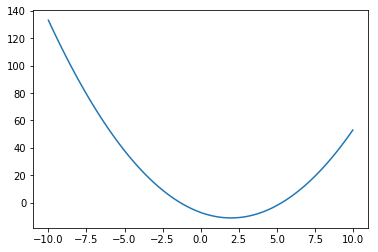

In [5]:
f = lambda x: x ** 2 - 4 * x - 7    #espera una variable y un set de valores y una funcion. lambda para definir polinomios
                                    #funciones exponenciales, funciones matematicas sencillas.


    
#FUNCION LAMBDA funcion anonima, sin definir def
#su contenido es una unica expresion en vez de un conjunto de expresiones
#funcion anonima que le paso un valor x y hace algo con ese valor x

#En ves de usar lambda podria haber definido esta funcion
#def f(x):
    #return x**2-4*x-7
    

df = lambda x: 2 * x - 4    #hago la derivada de forma manual y defino una nueva funcion para evaluar los valores

x = np.linspace(-10, 10, 100)
y = f(x)
plt.plot(x, y)  #SIRVE PARA GRAFICAR LINEAS y que queden como lineas y no un conjunto de puntos



In [6]:
# se define un epslon muy pequeño, como criterio de termino.


# se utiliza un while, porque no sabemos cuantas iteraciones necesarias para llegar al optimo. criterio de termino cuando 
# no se cumpla el criterio del while

#mientras el valor absoluto  de f(x) sea mayor al epsilon la solucion no es lo suficientemente buena y se sigue iterando


In [7]:
def newton_raphson(f, df, epsilon, x0):
    x = x0
    i = 0
    while abs(f(x)) > epsilon:
        x = x - f(x)/df(x)
        i += 1
        
    print("The method converged to {} in {} iterations. (epsilon = {})".format(x, i, epsilon)) #.format para pasar imprimir 
                                                                                                #los datos 
    return x



#ejecutar el algoritmo, x0 punto de partida

newton_raphson(f, df, 0.01, -10)

The method converged to -1.3173802020319245 in 4 iterations. (epsilon = 0.01)


-1.3173802020319245

In [8]:
# SI NO LE PASO UN VALOR, python asigna un valor por defecto. Los que tiene un valor por defecto se ponen al final.
#POR LO TANTO EN LA FUNCION AL LLAMARLA NO ES NECESARIO PEDIRLE UN PARAMETRO AL USUARIO
# SON PARAMETROS OPCIONALES

def newton_raphson(f, df, x0, epsilon=0.01):
    x = x0
    i = 0
    while abs(f(x)) > epsilon:
        x = x - f(x)/df(x)
        i += 1
        
    print("The method converged to {} in {} iterations. (epsilon = {})".format(x, i, epsilon))
    return x



#ejecutar el algoritmo, x0 punto de partida

newton_raphson(f, df, -10)

The method converged to -1.3173802020319245 in 4 iterations. (epsilon = 0.01)


-1.3173802020319245

# The Secant Method
$$x_{i + 1} = x_{i} - \frac{f(x_{i - 1})(x_{i - 1} - x_{i}) }{f(x_{i - 1}) - f(x_{i})}$$
$$f(x) = e^{-x} - x$$
$x_{0} = 1$, $x_{-1} = 0$

Function:

def secant_method (f, x0, x_1):
    // your code here
    return x
solution:

x = [0.5, 0.5663110031972182, 0.5671431650348622, 0.5671432904097811, 0.5671432904097811]

et = [100.0, 11.709290976662398, 0.14672870783743905, 2.2106391984397626e-05]

In [9]:
import numpy as np
np.e  #numero de euler
print("numero de euler: ",np.e)


f = lambda x: np.e ** (-x) - x    #la funcion recibe un x, lo mismo que las funciones lambda anteriores


def secant_method (f, x0 ,x_1, epsilon=0.001):
    x = x0
    while abs(f(x)) > epsilon:
        
        aux = x
        x = x - (f(x_1) * (x_1-x)) / (f(x_1)-f(x))
        x_1 = aux
        
    return (x)
    
print("solucion metodo de la secante: ",secant_method(f,1,0))

numero de euler:  2.718281828459045
solucion metodo de la secante:  0.567394560401312


# PANDAS

In [10]:
import pandas as pd

Import functions:

pd.import_csv()
pd.import_excel()
Datasets:

Boston Crimes Dataset (ISO-8859-1): crimes.csv
Google Reads Books: books.csv

In [11]:
# pd.import_csv()   separado por coma
#pd.import_excel()    desde excel

In [12]:
boston = pd.read_csv('data/crime.csv', encoding='ISO-8859-1') #leer la base de datos a partir de un csv y le pongo nombre boston


In [13]:
boston.head()


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [14]:
boston.info()  # me muestra todos los valores que no son nan. Los que pyton reconoce como datos, hay algunos que no reconoce


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
INCIDENT_NUMBER        319073 non-null object
OFFENSE_CODE           319073 non-null int64
OFFENSE_CODE_GROUP     319073 non-null object
OFFENSE_DESCRIPTION    319073 non-null object
DISTRICT               317308 non-null object
REPORTING_AREA         319073 non-null object
SHOOTING               1019 non-null object
OCCURRED_ON_DATE       319073 non-null object
YEAR                   319073 non-null int64
MONTH                  319073 non-null int64
DAY_OF_WEEK            319073 non-null object
HOUR                   319073 non-null int64
UCR_PART               318983 non-null object
STREET                 308202 non-null object
Lat                    299074 non-null float64
Long                   299074 non-null float64
Location               319073 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 41.4+ MB


In [15]:
boston.describe()   #estadisticas descriptivas de la base de datos

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2016.560586,6.609719,13.118205,42.214381,-70.908272
std,1185.285543,0.996344,3.273691,6.294205,2.159766,3.493618
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [16]:
type(boston)  # me dice que es un dataframe

# Es la union de series, cada columna representa informacion que son del mismo tipo de dato,asi pandas indexa primero 
# por columna y no por fila, para mantener esa consistencia en los tipos de datos

pandas.core.frame.DataFrame

In [17]:
boston['OFFENSE_DESCRIPTION'] #me muestra los datos de esa columna, me selecciona solo esa columna

0                                     LARCENY ALL OTHERS
1                                              VANDALISM
2                                    TOWED MOTOR VEHICLE
3                                   INVESTIGATE PROPERTY
4                                   INVESTIGATE PROPERTY
5             M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY
6                                             AUTO THEFT
7                                         VERBAL DISPUTE
8                                       ROBBERY - STREET
9                                         VERBAL DISPUTE
10                                        VERBAL DISPUTE
11                                  INVESTIGATE PROPERTY
12                   FIRE REPORT - HOUSE, BUILDING, ETC.
13                             THREATS TO DO BODILY HARM
14                                       PROPERTY - LOST
15                         SICK/INJURED/MEDICAL - PERSON
16                                        VERBAL DISPUTE
17                             

In [18]:
boston['OFFENSE_DESCRIPTION'].value_count()  #value count es para objetos que sean series 

#--------->   serie es un objeto, tiene una funcion value_count que esta definida dentro del objetivo y por eso la llamo 

#a poner .value_count digo que el objeto offense description haga eso
#en cambio sin poongo value_count(boston['OFFENSE_DESCRIPTION']) lo llamo como funcion

#value count me cuenta la repeticion de datos no numericos

AttributeError: 'Series' object has no attribute 'value_count'

In [ ]:
boston['OFFENSE_DESCRIPTION'].mean   #y llamo la media o std y llamo la desviacion estandar

In [ ]:
boston['MONTH'].mean